# 1.USA.gov Data

We recently performed an evaluation on 1.USA.gov and found that the number of people who use the service is declining, and there is not strong support to continue the service.    As a result, we have decided to  deactivate the service on June 30, 2016.  You can read more about this decision on the [USAGov Blog](https://blog.usa.gov/decommissioning-1-usa-gov).

This change will mean that the 1.USA.gov data stream will cease to work beginning in July 2016.


文件读取，借用列表推导式（list comprehesion）将每一行变换为待处理的json字符串序列，构成一组Python字典。

In [1]:
import json


def open_file_to_json_list(file_path):
    file = open(file_path, encoding="utf-8")
    i = 0
    records = []
    while 1:
        line = file.readline()
        if not line:
            print("stop")
            break
        else:
            i += 1
            print(i)
            try:
                res = json.loads(line)
                records.append(res)
            except Exception as e:
                print(e, i, line)
    return records


path = "datasets/usagov_bitly_data2013-05-17-1368832207"
# records = [json.loads(line) for line in fileinput.input(path)]
records = [json.loads(line) for line in open(path, encoding="utf-8")]
print(records[0])


{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30', 'c': 'US', 'nk': 0, 'tz': 'America/Los_Angeles', 'gr': 'CA', 'g': '15r91', 'h': '10OBm3W', 'l': 'pontifier', 'al': 'en-US', 'hh': 'j.mp', 'r': 'direct', 'u': 'http://www.nsa.gov/', 't': 1368832205, 'hc': 1365701422, 'cy': 'Anaheim', 'll': [33.816101, -117.979401]}


In [2]:
records[0]["tz"]

'America/Los_Angeles'

In [3]:
# 去除没有时区字段的记录，对时区进行计数
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

# 随便打印前10个时区
time_zones[:10]

# 此时这里会打印出空的时区 rec.get('rec')可去除空值，但这里需要保留，也统计未知时区的记录

['America/Los_Angeles',
 '',
 'America/Phoenix',
 'America/Chicago',
 '',
 'America/Indianapolis',
 'America/Chicago',
 '',
 'Australia/NSW',
 '']

In [4]:
# 笨方法，遍历时区然后更新字典counts
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

from collections import defaultdict

def get_counts2(sequence):
    # 第二种调用python标准库
    counts = defaultdict(int)  # 所有值均被初始化为0
    for x in sequence:
        counts[x] += 1
    return counts


counts = get_counts(time_zones)
print(counts['America/Los_Angeles'])
print(len(time_zones))

421
3839


In [5]:
# 排序，找出前n位的时区和其计数的值
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]


top_counts(counts)

[(40, 'America/Phoenix'),
 (50, 'America/Indianapolis'),
 (85, 'Europe/London'),
 (89, 'America/Denver'),
 (102, 'Asia/Tokyo'),
 (184, 'America/Puerto_Rico'),
 (421, 'America/Los_Angeles'),
 (636, ''),
 (686, 'America/Chicago'),
 (903, 'America/New_York')]

In [6]:
# 或者用标准库，Counter
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 903),
 ('America/Chicago', 686),
 ('', 636),
 ('America/Los_Angeles', 421),
 ('America/Puerto_Rico', 184),
 ('Asia/Tokyo', 102),
 ('America/Denver', 89),
 ('Europe/London', 85),
 ('America/Indianapolis', 50),
 ('America/Phoenix', 40)]

In [7]:
# 用pandas对时区进行计数
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; H...,en-US,US,Anaheim,15r91,CA,10OBm3W,1.365701e+09,j.mp,NaN,pontifier,"[33.816101, -117.979401]",0.0,direct,1.368832e+09,America/Los_Angeles,http://www.nsa.gov/
1,NaN,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,en-us,None,NaN,ifIpBW,NaN,ifIpBW,1.302189e+09,1.usa.gov,NaN,bitly,NaN,0.0,http://www.usa.gov/,1.368832e+09,,http://answers.usa.gov/system/selfservice.cont...
2,NaN,Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20...,"en-US,en;q=0.5",US,Fort Huachuca,10DaxOu,AZ,10DaxOt,1.368815e+09,1.usa.gov,NaN,jaxstrong,"[31.5273, -110.360703]",1.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.368832e+09,America/Phoenix,http://www.saj.usace.army.mil/Media/NewsReleas...
3,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; S...,en-US,US,Houston,TysVFU,TX,TChsoQ,1.354719e+09,1.usa.gov,NaN,o_5004fs3lvd,"[29.7633, -95.363297]",1.0,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,1.368832e+09,America/Chicago,https://nationalregistry.fmcsa.dot.gov/
4,NaN,Opera/9.80 (Android; Opera Mini/7.5.33286/29.3...,en,None,NaN,10IGW7m,NaN,10IGW7l,1.368738e+09,1.usa.gov,NaN,peacecorps,NaN,0.0,http://t.co/CDO9hLTtNT,1.368832e+09,,http://www.peacecorps.gov/learn/howvol/ab530gr...
5,NaN,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,en-US,US,Mishawaka,13GrCeP,IN,13GrCeP,1.368131e+09,1.usa.gov,NaN,bitly,"[41.612301, -86.1381]",0.0,direct,1.368832e+09,America/Indianapolis,https://petitions.whitehouse.gov/petition/repe...
6,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) G...,"en-US,en;q=0.5",US,Hammond,YmtpnZ,WI,YmtpnZ,1.363712e+09,1.usa.gov,NaN,bitly,"[45.007, -92.459099]",1.0,http://www.bwsd.k12.wi.us/SitePages/Home.aspx,1.368832e+09,America/Chicago,http://pld.dpi.wi.gov/files/pld/images/LinkWI.png
7,NaN,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_3_5 li...,en-us,None,NaN,13oM0hV,NaN,15PUeH0,1.368714e+09,go.nasa.gov,NaN,nasatwitter,NaN,0.0,http://t.co/YIsVhFDLj2,1.368832e+09,,http://www.nasa.gov/multimedia/imagegallery/im...
8,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,en-us,AU,Sydney,15r91,02,10OBm3W,1.365701e+09,j.mp,NaN,pontifier,"[-33.8615, 151.205505]",0.0,direct,1.368832e+09,Australia/NSW,http://www.nsa.gov/
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",None,NaN,109LtDc,NaN,109LtDb,1.368822e+09,go.nasa.gov,NaN,nasatwitter,NaN,0.0,http://t.co/yPSKO2t5v1,1.368832e+09,,http://www.nasa.gov/mission_pages/sunearth/new...


In [8]:
# 摘要视图将大的DataFrame对象展示出来，然后用Series对象的计数方法拼起来输出
print(frame['tz'][:10])
frame['tz'].value_counts()[:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object


America/New_York        903
America/Chicago         686
                        636
America/Los_Angeles     421
America/Puerto_Rico     184
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
America/Phoenix          40
Name: tz, dtype: int64

In [9]:
# 画张水平条形图，展示，将空值字符串转换为Unknown
import matplotlib as plot
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ""] = 'Unknown'
tz_counts = clean_tz.value_counts()

tz_counts[:10].plot(kind='barh', rot=0)

In [10]:
# 将a字段表示的浏览器的user_agent信息，解析出来
print(frame['a'][10:20])
results = Series([x.split()[0] for x in frame.a.dropna()])
results.value_counts()[:8]

10    Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
11    Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...
12    Mozilla/5.0 (iPad; CPU OS 6_1_2 like Mac OS X)...
13    Mozilla/5.0 (Windows NT 5.1; rv:20.0) Gecko/20...
14    Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...
15    Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...
16    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
17    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
18    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3)...
19    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) G...
Name: a, dtype: object


Mozilla/5.0           3251
Mozilla/4.0            322
CakePHP                 38
ShortLinkTranslate      36
TVersity                30
Opera/9.80              28
Dalvik/1.6.0            19
Xenu                    15
dtype: int64

In [11]:
# 如果agent字符串中包含“Windows”，即可认为该用户为Windows用户，这样就可以安装时区和操作系统两个对数据进行分组
cframe = frame[frame.a.notnull()]
oprating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
oprating_system[:5]


array(['Not Windows', 'Windows', 'Windows', 'Not Windows', 'Not Windows'],
      dtype='<U11')

In [12]:
# 将分组中的时区字段为空的转换为可见的类型,如Unknown
# cframe['tz'].fillna('Missing', inplace=True)
index = cframe['tz'] == ""
cframe.loc[index, ['tz']] = 'Unknown'
# print(np.sum(cframe['tz']=="Missing"))
by_tz_and_os = cframe.groupby(['tz', oprating_system])
agg_counts = by_tz_and_os.size().unstack().fillna(0)
agg_counts[1:20]

C:\Python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Not Windows,Windows
tz,,
Africa/Casablanca,0.0,1.0
Africa/Ceuta,4.0,2.0
Africa/Gaborone,0.0,1.0
Africa/Johannesburg,2.0,0.0
America/Anchorage,5.0,3.0
America/Argentina/Buenos_Aires,4.0,7.0
America/Argentina/Catamarca,1.0,0.0
America/Argentina/Cordoba,0.0,2.0
America/Asuncion,0.0,1.0


In [13]:
# 选取最常出现的时区 ，可以根据行数构成间接索引数组
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
Africa/Cairo                      55
Africa/Casablanca                 46
Africa/Ceuta                      80
Africa/Gaborone                   75
Africa/Johannesburg               70
America/Anchorage                 68
America/Argentina/Buenos_Aires    31
America/Argentina/Catamarca       66
America/Argentina/Cordoba         35
America/Asuncion                  62
dtype: int64

In [14]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Phoenix,22.0,18.0
America/Indianapolis,29.0,21.0
Europe/London,62.0,23.0
America/Denver,41.0,48.0
Asia/Tokyo,88.0,14.0
America/Puerto_Rico,93.0,91.0
America/Los_Angeles,207.0,214.0
Unknown,484.0,152.0
America/Chicago,343.0,343.0


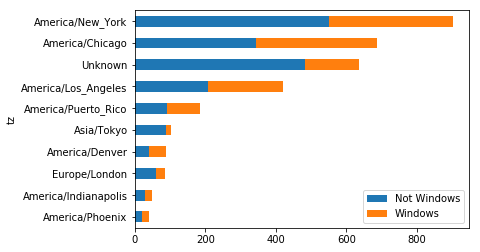

In [15]:
# 这里也画张图，用stacked=true 来生产一张堆积条形图
count_subset.plot(kind='barh', stacked=True)

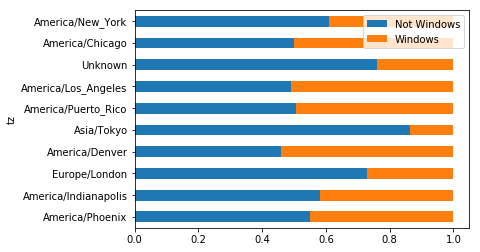

In [16]:
# 为了更好区分较小分组中的Windows用户的相对比例，将行规范化为“总计是1”，并重新绘图
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

# 2. MovieLens Dataset
MovieLens数据集保存了用户对电影的评分。基于这个数据集，我们可以测试一些推荐算法、评分预测算法。
数据集来源: https://grouplens.org/datasets/movielens/1m/ 

## MovieLens 100k
该数据集记录了943个用户对1682部电影的共100,000个评分，每个用户至少对20部电影进行了评分。

文件u.info保存了该数据集的概要：

943 users
1682 items
100000 ratings
文件u.item保存了item的信息，也就是电影的信息，共1682部电影，其id依次是1、2、……、1682。文件中每一行保存了一部电影的信息，格式如下：

movie id | movie title | release date | video release date |
IMDb URL | unknown | Action | Adventure | Animation |
Children's | Comedy | Crime | Documentary | Drama | Fantasy |
Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
Thriller | War | Western |
注意，最后19个字段保存的是该电影的类型，一个字段对应一个类型，值为0代表不属于该类型，值为1代表属于该类型，类型信息保存在文件u.genre中。

随便浏览了一下u.item文件，发现基本是20世纪90年代的电影。

文件u.genre保存了电影的类型信息。

文件u.user保存了用户的信息，共有943个用户，其id依次是1、2、……、943。文件中每一行保存了一个用户的信息，格式如下：

user id | age | gender | occupation | zip code
文件u.occupation保存了用户职业的集合。

下面介绍数据集的主要文件。

文件u.data保存了所有的评分记录，每一行是一个用户对一部电影的评分，共有100000条记录。当然，如果某用户没有对某电影评分，则不会包含在该文件中。评分的分值在1到5之间，就是1、2、3、5这5个评分。每一行格式如下：

user id | item id | rating | timestamp
其中，item id就是电影的id，时间戳timestamp是评分时间。我转换了下时间戳，也是在20世纪90年代。

文件u1.base和文件u1.test放在一起就是文件u.data。将u.data按照80%/20%的比例分成u1.base和u1.test，可以将u1.base作为训练集，u1.test作为测试集。u2、u3、u4、u5系列文件和u1类似。u1、u2、u3、u4、u5的测试集是不相交的，它们可以用来做（5折交叉验证）5 fold cross validation。

文件ua.base和文件ua.test也是由u.data拆分而来，在ua.test中包含了每个用户对10部电影的评分，从u.data去掉ua.test得到ua.base。ub.base和ub.test也使用了同样的生成方法。另外，ua.test和ub.test是不相交的。

## MovieLens 1M
该数据集保存的是6040个用户对3952部电影的1000209个评分记录。具体可以参考其README文件。


## MovieLens 10M
71567个用户，10681部电影，10000054条评分记录，同时多了个用户为电影设置的标签。

Tag Genome 该数据集下有三个数据文件。


In [17]:
"""
接上：
movies.dat：其每一行的格式是： <MovieID><Title><MoviePopularity> 

MoviePopularity是在MovieLens中对该电影的评分次数。

tag.dat：每一行的格式是：<TagID><Tag><TagPopularity> 
    
<TagPopularity>是使用该Tag的用户数，一个用户最多算1次。

tag_relevance.dat：：每一行的格式是：<MovieID><TagID><Relevance>
    
<Relevance>的值在0和1之间，值越大，Tag与Movie的关联性越强。
"""

"""
脚本实现txt文件内容替换
example: 把file3.txt 的 '::' 替换为 ',',并保存到file4.txt

"""
import re  


def replace_file_str(file_in_name, file_out_name, string1, string2):
    
    fp3=open(file_in_name,"r")  
    fp4=open(file_out_name,"w")  

    for s in fp3.readlines():#先读出来     
        fp4.write(s.replace(string1, string2)) #替换 并写入  

    fp3.close()  
    fp4.close()
    
# replace_file_str("file3.txt", "file4.txt", "::", ",")

In [18]:
import pandas as pd

uname = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/ml-1m/users.dat', sep='::', header=None, names=uname, engine='python')
'''
sep : str, default ‘,’
指定分隔符。如果不指定参数，则会尝试使用逗号分隔。分隔符长于一个字符并且不是‘\s+’,
将使用python的语法分析器。并且忽略数据中的逗号。正则表达式例子：'\r\t'

header : int or list of ints, default ‘infer’指定行数用来作为列名，数据开始行数。

names : array-like, default None
用于结果的列名列表，如果数据文件中没有列标题行，就需要执行header=None。
engine解析器引擎使用。C引擎速度更快，而python引擎目前更加完善。除去警告
'''

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')
mname = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/ml-1m/movies.dat', sep='::', header=None, names=mname, engine='python')

data = pd.merge(pd.merge(movies, ratings), users)
data.loc[0]  #ix[0]已经deprecated弃用


movie_id                                1
title                    Toy Story (1995)
genres        Animation|Children's|Comedy
user_id                                 1
rating                                  5
timestamp                       978824268
gender                                  F
age                                     1
occupation                             10
zip                                 48067
Name: 0, dtype: object

In [19]:
'''
枢轴表 
pandas.pivot_table(data, values=None, 
index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
'''
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [20]:
ratings_by_titles = data.groupby('title').size()
print(ratings_by_titles[:10])
active_titles = data.groupby('title').size().index[data.groupby('title').size() >= 250]
active_titles


title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [21]:
mean_ratings=mean_ratings.loc[active_titles]
# 为了解女性观众最喜欢的电影，我们可以对F列进行降序
top_female_rating=mean_ratings.sort_values(by='F',ascending='False')
top_female_rating[:10]

gender,F,M
title,,
Battlefield Earth (2000),1.574468,1.616949
Barb Wire (1996),1.585366,2.100386
Rocky V (1990),1.878788,2.132780
Speed 2: Cruise Control (1997),1.906667,1.863014
"Avengers, The (1998)",1.915254,2.017467
Anaconda (1997),2.000000,2.248447
Howard the Duck (1986),2.074627,2.103542
Striptease (1996),2.150000,2.193277
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991),2.152174,2.121951


In [22]:
# 计算评分分歧
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [26]:
# 将排序结果反序排列，取到的就是男性最喜欢的电影
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [29]:
# 如果只是找出分歧最大的电影，不考虑性别因素，则可以计算得分数据的方差或者标准差

rating_std_by_title = data.groupby('title')["rating"].std()
rating_std_by_title = rating_std_by_title.ix[active_titles]
print(rating_std_by_title)
rating_std_by_title.order(ascending=False)[:10]

title
'burbs, The (1989)                                                    1.107760
10 Things I Hate About You (1999)                                     0.989815
101 Dalmatians (1961)                                                 0.982103
101 Dalmatians (1996)                                                 1.098717
12 Angry Men (1957)                                                   0.812731
13th Warrior, The (1999)                                              1.140421
2 Days in the Valley (1996)                                           0.921592
20,000 Leagues Under the Sea (1954)                                   0.869685
2001: A Space Odyssey (1968)                                          1.042504
2010 (1984)                                                           0.946618
28 Days (2000)                                                        0.920278
39 Steps, The (1935)                                                  0.853501
54 (1998)                                     

C:\Python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


AttributeError: 'Series' object has no attribute 'order'